# 导入数据集MNIST

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子
torch.manual_seed(42)
# 定义数据转换方法
transform = transforms.Compose([
    transforms.ToTensor(),  # 将数据转换为张量
])

# 训练：数据、数据加载器
train_dataset = datasets.MNIST(root=r"D:\code\data\MNIST", train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
# 测试：数据、数据加载器
test_dataset = datasets.MNIST(root=r"D:\code\data\MNIST", train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

# 直接导入数据集(文件夹-文件)

In [43]:
from torchvision.datasets import ImageFolder

data_path = r"D:\code\data\Fruit101"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
datasets = ImageFolder(data_path, transform=transform)
len(datasets), datasets.classes, datasets.class_to_idx

(1473,
 ['Apple',
  'avocado',
  'banana',
  'chery fruit',
  'grapes',
  'mango fruit',
  'orange',
  'ressberry'],
 {'Apple': 0,
  'avocado': 1,
  'banana': 2,
  'chery fruit': 3,
  'grapes': 4,
  'mango fruit': 5,
  'orange': 6,
  'ressberry': 7})

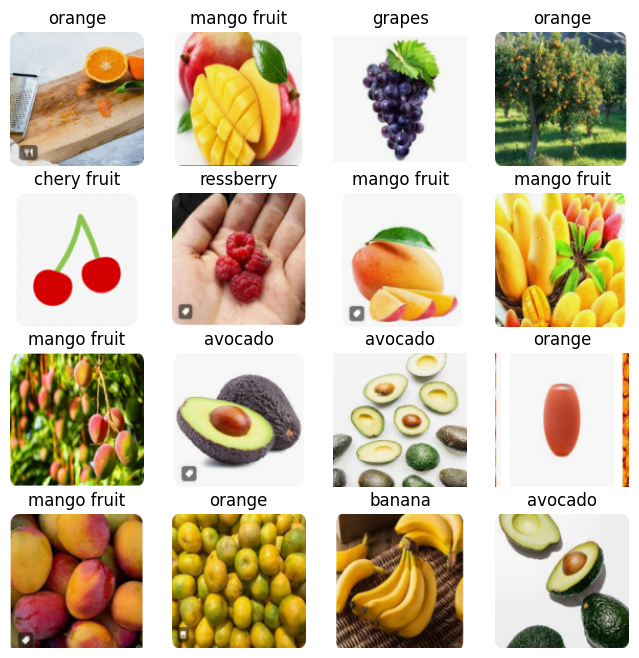

In [44]:
def plot_from_dataset(dataset, shuffle=True):
    dataloader = DataLoader(dataset, batch_size=16, shuffle=shuffle)
    images, labels = next(iter(dataloader))
    images = np.transpose(images, (0, 2, 3, 1))
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')
        if hasattr(dataset, 'classes'):
            ax.set_title(dataset.classes[labels[i]], fontsize=12)
        else:
            ax.set_title(labels[i], fontsize=12)

    plt.show()


plot_from_dataset(datasets)

# 封装成类数据集(文件命名)

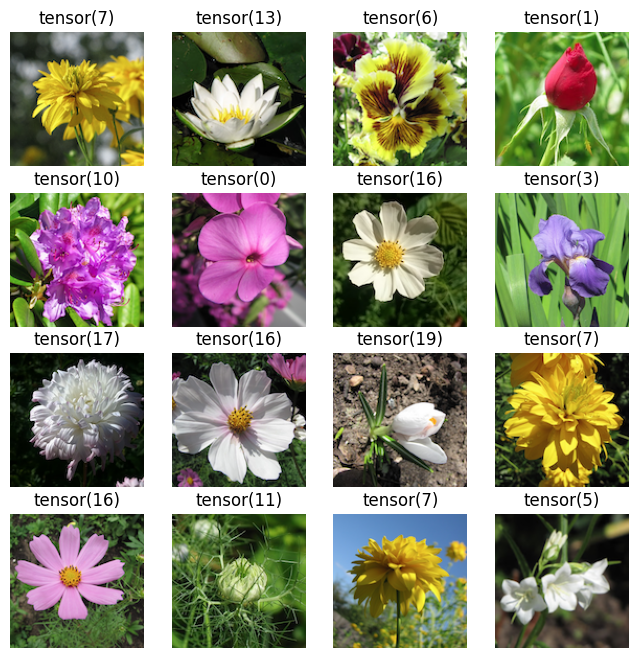

In [45]:
import os
from PIL import Image
from torch.utils.data import Dataset


class Flowers(Dataset):
    def __init__(self, data_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform

        for filename in sorted(os.listdir(data_dir)):
            image_path = os.path.join(data_dir, filename)
            self.image_paths.append(image_path)
            label = int(filename.split('_')[0])
            self.labels.append(label)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        label = torch.tensor(label, dtype=torch.long)

        return image, label


data_dir = r"D:\code\data\FlowerColor\flowers\flowers"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
dataset = Flowers(data_dir, transform=transform)
plot_from_dataset(dataset)

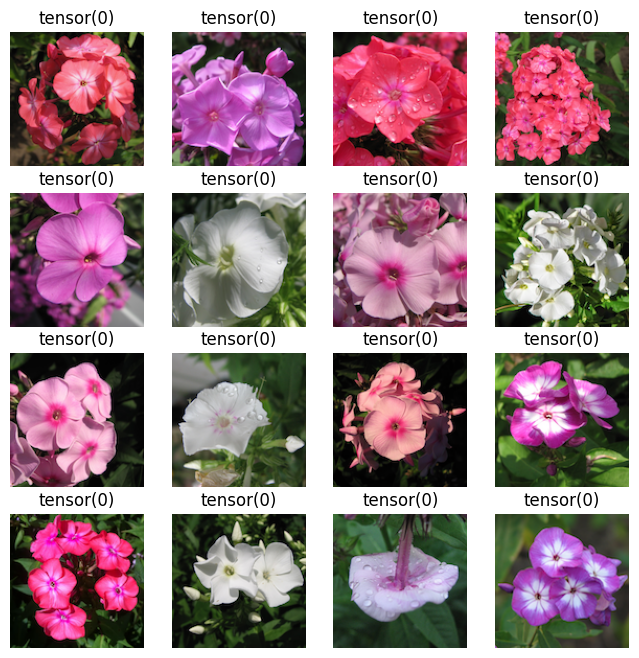

In [46]:
from torch.utils.data import Subset

dataset = Flowers(data_dir, transform=transform)
subset = Subset(dataset, [i for i in range(16)])
plot_from_dataset(subset, False)

# 封装成类数据集(csv)

In [47]:
import pandas as pd

csv = pd.read_csv(r"D:\code\data\FlowerColor\flower_images\flower_images\flower_labels.csv")
csv.iloc[:, 1].drop_duplicates().to_numpy()

array([0, 2, 1, 6, 7, 4, 5, 3, 8, 9], dtype=int64)

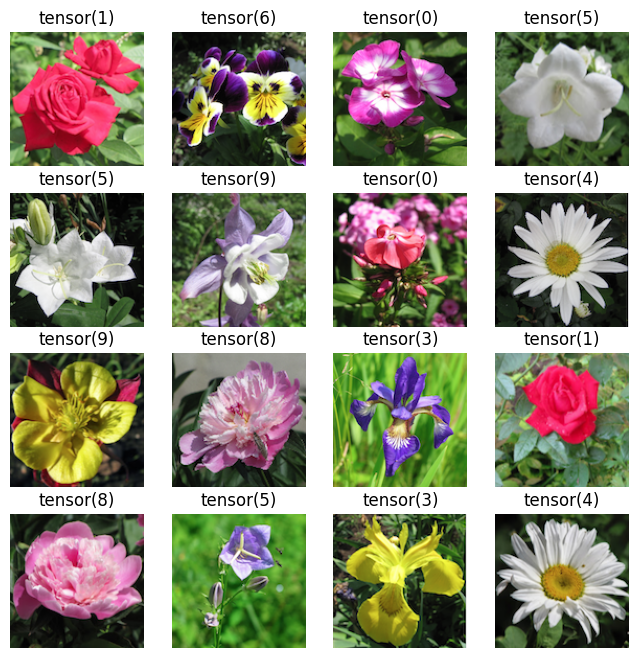

In [48]:
class FlowersImages(Dataset):
    def __init__(self, data_dir, csv_file, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform

        csv = pd.read_csv(os.path.join(data_dir, csv_file))

        for filename in sorted(os.listdir(data_dir)):
            if filename.endswith('.png'):
                self.image_paths.append(os.path.join(data_dir, filename))
                label = csv.loc[csv['file'] == filename, 'label'].iloc[0]
                self.labels.append(label)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        label = torch.tensor(label, dtype=torch.long)

        return image, label


data_dir = r"D:\code\data\FlowerColor\flower_images\flower_images"
csv_file = r"D:\code\data\FlowerColor\flower_images\flower_images\flower_labels.csv"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
dataset = FlowersImages(data_dir, csv_file, transform=transform)
plot_from_dataset(dataset)